In [1]:
import pandas as pd
import numpy as np
from function import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n = 1000

eps = 0 # np.random.normal(0, 0.1, n)

a = 3
b = 4

b0 = -1
b1 = -2

sim = 1000

p = 0.5

In [3]:
df   = pd.DataFrame(np.random.uniform(0,1,size=(n, 3)),columns=['X1','X2','X3'])

In [4]:
single_sobol = singletons(df,n,sim,a,b,eps)

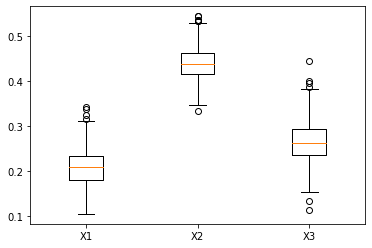

In [5]:
fig, ax = plt.subplots()
ax.boxplot(single_sobol)
ax.set_xticklabels(single_sobol.columns)

single_sobol['sample'] = 'complete'

In [6]:
#Complete - Case analysis


693


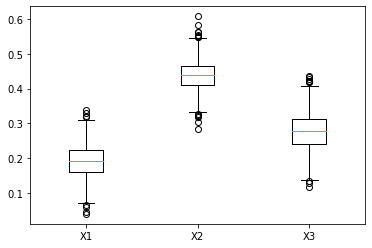

In [7]:
Xi ='X1'

omega = pd.DataFrame(np.random.binomial(size=n, n=1, p= 0.7),columns=[Xi])
omega[df.drop([Xi],axis=1).columns]=  np.ones((n,2),dtype=int)

cc = df.where(omega==1,np.nan).dropna()
print(len(cc))

single_sobol_cc = singletons(cc,len(cc),sim,a,b,eps)

fig, ax = plt.subplots()
ax.boxplot(single_sobol_cc)
ax.set_xticklabels(single_sobol_cc.columns)

single_sobol_cc['sample'] = 'cc'

In [8]:
#Simulate missing values in the predictor 

In [9]:
len(cc)

693

693


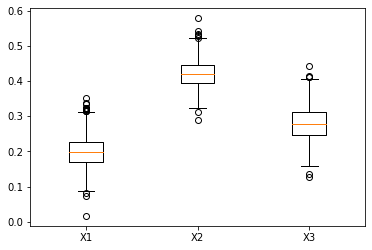

In [10]:
b0=0.5
b1 = 0.5

y = dataset(n,df.copy()).ishigami(eps)(a,b)

omega = pd.DataFrame(np.random.binomial(size=n, n=1, p= pi(y,b0,b1)),columns=[Xi])
omega[df.drop([Xi],axis=1).columns]=  np.ones((n,2),dtype=int)

cc_y = df.where(omega==1,np.nan).dropna()
print(len(cc))

single_sobol_cc_y = singletons(cc_y,len(cc_y),sim,a,b,eps)

fig, ax = plt.subplots()
ax.boxplot(single_sobol_cc_y)
ax.set_xticklabels(single_sobol_cc_y.columns)

single_sobol_cc_y['sample'] = 'mar_y'

693


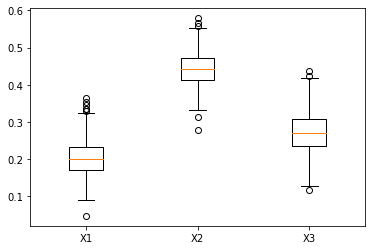

In [11]:
b0 = 0.5
b1 = 0.5

y = df['X2'] 

omega = pd.DataFrame(np.random.binomial(size=n, n=1, p= pi(y,b0,b1)),columns=[Xi])
omega[df.drop([Xi],axis=1).columns]=  np.ones((n,2),dtype=int)

cc_x = df.where(omega==1,np.nan).dropna()
print(len(cc))

single_sobol_cc_x = singletons(cc_x,len(cc_x),sim,a,b,eps)

fig, ax = plt.subplots()
ax.boxplot(single_sobol_cc_x)
ax.set_xticklabels(single_sobol_cc_x.columns)

single_sobol_cc_x['sample'] = 'mar_x'

693


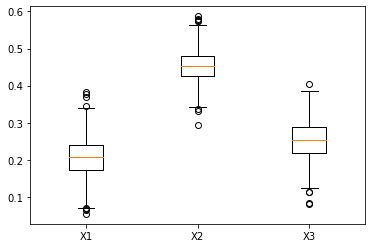

In [12]:
b0 = 0.5
b1 = 0.5

y = df['X3'] 

omega = pd.DataFrame(np.random.binomial(size=n, n=1, p= pi(y,b0,b1)),columns=[Xi])
omega[df.drop([Xi],axis=1).columns]=  np.ones((n,2),dtype=int)

cc_x = df.where(omega==1,np.nan).dropna()
print(len(cc))

single_sobol_cc_x = singletons(cc_x,len(cc_x),sim,a,b,eps)

fig, ax = plt.subplots()
ax.boxplot(single_sobol_cc_x)
ax.set_xticklabels(single_sobol_cc_x.columns)

single_sobol_cc_x['sample'] = 'mar_x'

693


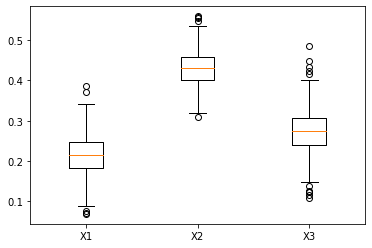

In [13]:
b0 = 0.5
b1 = 0.5

y = df['X2'] + df['X3']

omega = pd.DataFrame(np.random.binomial(size=n, n=1, p= pi(y,b0,b1)),columns=[Xi])
omega[df.drop([Xi],axis=1).columns]=  np.ones((n,2),dtype=int)

cc_xx = df.where(omega==1,np.nan).dropna()
print(len(cc))

single_sobol_cc_xx = singletons(cc_xx,len(cc_xx),sim,a,b,eps)

fig, ax = plt.subplots()
ax.boxplot(single_sobol_cc_xx)
ax.set_xticklabels(single_sobol_cc_xx.columns)

single_sobol_cc_xx['sample'] = 'mar_xx'

In [14]:
single_sobol_cc_xx

,X1,X2,X3,sample
0,0.190374,0.450583,0.309082,mar_xx
1,0.161935,0.458902,0.300212,mar_xx
2,0.257325,0.385640,0.206515,mar_xx
3,0.284076,0.439740,0.286063,mar_xx
4,0.210535,0.502464,0.337932,mar_xx
...,...,...,...,...
995,0.290133,0.371905,0.334630,mar_xx
996,0.145609,0.398742,0.285786,mar_xx
997,0.195330,0.446352,0.308197,mar_xx
998,0.234826,0.454779,0.349794,mar_xx


In [15]:
cdf = pd.concat([single_sobol,single_sobol_cc,single_sobol_cc_y,single_sobol_cc_x,single_sobol_cc_xx],axis=0)  

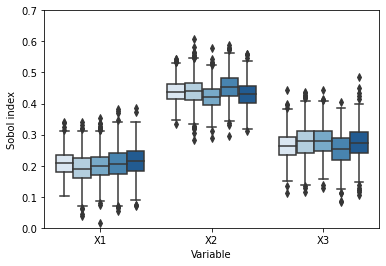

In [16]:
dd = pd.melt(cdf, id_vars= ['sample'],value_vars=['X1','X2','X3'],var_name='Variable')
dd = dd.rename(columns={'value':'Sobol index'})
 
ax = sns.boxplot(x='Variable',y='Sobol index',data=dd,hue='sample',palette="Blues") 
ax.legend_.remove()
ax.set(ylim=(0.0, 0.7))
fig = ax.get_figure()
